# 桌遊習慣分析

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# This is a custom matplotlib style that I use for most of my charts
#plt.style.use('https://gist.githubusercontent.com/rhiever/d0a7332fe0beebfdc3d5/raw/205e477cf231330fe2f265070f7c37982fd3130c/tableau10.mplstyle')

boardgame_data = pd.read_csv('DataBase.csv')
boardgame2_data = pd.read_csv('DataBase2.csv')
#age_gender_data.head()
boardgame_data

,Gender,Education,Like,Hard,People,Time,Money,Deep,Collection
0,1,4,1,2,2,2,2,1,2
1,1,4,1,2,2,3,2,2,1
2,1,4,1,2,3,2,2,1,1
3,1,4,1,2,3,3,2,3,1
4,1,4,1,2,2,3,2,2,1
5,2,4,1,2,3,2,2,2,1
6,1,4,6,2,2,1,1,1,1
7,1,4,1,2,2,2,2,2,1
8,2,4,1,2,2,1,2,1,1
9,1,4,2,1,2,1,3,1,1


#表格

#2 Pie chart-Male preference

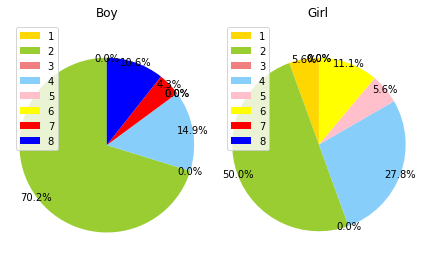

In [7]:
labels = boardgame2_data['Like_BG']
sizes = boardgame2_data['Boy']

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink', 'yellow', 'red', 'blue']
 
# Plot
plt.subplot(1, 2, 1)
patches, texts, autotexts = plt.pie(sizes, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance = 1)

plt.title('Boy')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()


sizes2 = boardgame2_data['Girl']

# Plot
plt.subplot(1, 2, 2)
patches, texts, autotexts = plt.pie(sizes2, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance = 1)

plt.title('Girl')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

#3 Pie chart-Female preference

Bar chart-Preference For Eight Type

''

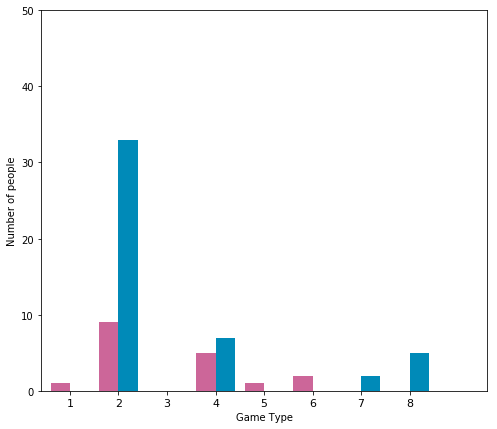

In [8]:
fig = plt.figure(figsize=(8, 7))
ax1 = fig.add_subplot(111)

for (i, row) in boardgame2_data.iterrows():
    plt.bar([i - 0.2, i + 0.2], [row['Girl'], row['Boy']],
            color=['#CC6699', '#008AB8'], width=0.4, align='center', edgecolor='none')
    
plt.xlim(-0.6, 8.6)
plt.xticks(range(0, 8), boardgame2_data['Like_BG'], fontsize=11)
plt.grid(False, axis='x')
plt.yticks(np.arange(0, 60, 10))
#           ['{}m'.format(int(x / 1e6)) if x > 0 else 0 for x in np.arange(0, 13e6, 1e6)])
plt.xlabel('Game Type')
plt.ylabel('Number of people')

plt.savefig('pop_pyramid_grouped.pdf')
;

###3) Relative trends between the categories can be masked by displaying absolute values.

Observed each type, does PLAYTIME influence how much will players COST.


In [26]:
boardgame_data_sp.groupby(['Time', 'Like']).agg({'Money': sum, 'People': 'mean'})

Money    People
Time Like                 
1    1         0  0.000000
     2        13  1.900000
     3         0  0.000000
     4        11  2.000000
     5         1  1.000000
     6         1  1.000000
     7         0  0.000000
     8         4  1.666667
2    1         0  0.000000
     2        57  2.321429
     3         0  0.000000
     4        12  2.500000
     5         0  0.000000
     6         2  1.000000
     7         3  1.666667
     8         6  1.500000
3    1         0  0.000000
     2        11  2.142857
     3         0  0.000000
     4         4  1.666667
     5         2  1.500000
     6         0  0.000000
     7         0  0.000000
     8         0  0.000000

[[   0  722    0 1100  500  500    0 1000]
 [   0 1055    0 1200    0 1000  750 1000]
 [   0  916    0 1000 1000    0    0    0]]


([<matplotlib.axis.XTick at 0x215661bacc0>,
 <a list of 8 Text xticklabel objects>)

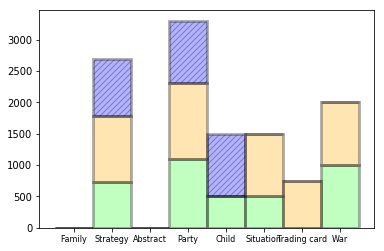

In [8]:
boardgame_data_sp = pd.read_csv('DataBaseSp.csv')

timeLevel = [1, 2, 3]
likeLevel = np.array([1, 2, 3, 4, 5, 6, 7, 8])

totalPay = boardgame_data_sp.groupby(['Time', 'Like']).agg({'Money': sum})
number = boardgame_data_sp.groupby(['Time', 'Like']).size()


costBar=np.array([[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]])

for i in timeLevel :
    for j in likeLevel :
        if(number[i][j] != 1) :
            costBar[i-1][j-1] =  totalPay['Money'][i][j] *500 / (number[i][j]-1)

            
# boardgame_data = pd.read_csv('DataBase.csv')

# timeLevel = [1, 2, 3]
# likeLevel = np.array([1, 2, 3, 4, 5, 6, 7, 8])

# totalPay = boardgame_data.groupby(['Time', 'Like']).agg({'Money': sum})
# number = boardgame_data.groupby(['Time', 'Like']).size()


# costBar=np.array([[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]])

# for i in timeLevel :
#     for j in likeLevel :
#         if(number[i][j] != 0) :
#             costBar[i-1][j-1] =  totalPay['Money'][i][j] *500 / number[i][j]
            
            
            
            
            
print(costBar)

    
bar_width = 1
inHalfHour = plt.bar(likeLevel,costBar[0], bar_width,color='#33FF33',edgecolor='black',linewidth=3,alpha=0.3)
inHour = plt.bar(likeLevel,costBar[1], bar_width,color='#FFAA00',edgecolor='black',linewidth=3,alpha=0.3,bottom=costBar[0]) 
overHour = plt.bar(likeLevel,costBar[2], bar_width,color='#0000FF',edgecolor='black',linewidth=3,alpha=0.3,bottom=costBar[0]+costBar[1], hatch='////')
plt.xticks(range(1, 9, 1), ['Family','Strategy','Abstract', 'Party', 'Child', 'Situation', 'Trading card', 'War'], fontsize=8)

Text(0, 0.5, 'Time')

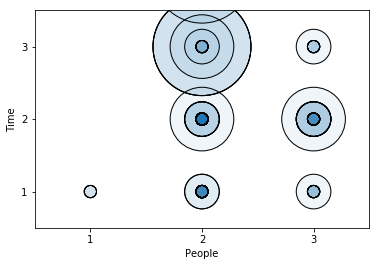

In [10]:
x = boardgame_data['People']
y = boardgame_data['Time']
plt.scatter(x, y, s= 150 * boardgame_data['Collection'] **3, alpha = 0.07)
plt.scatter(x, y, edgecolor='black', s= 150 * boardgame_data['Collection'] **3, color='none')
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 3.5)
plt.xticks(np.arange(1, 4, 1))
plt.yticks(np.arange(1, 4, 1))
plt.xlabel('People')
plt.ylabel('Time')

偏好跟願意花的錢(重疊越多點越深)
問題1 : X軸說明文字沒有出現
問題2 : 級距錯誤
問題3 : **是啥

ValueError: 'c' argument has 162 elements, which is not acceptable for use with 'x' with size 160, 'y' with size 160.

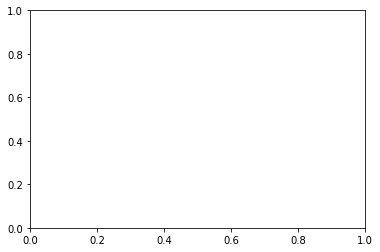

In [19]:
record = np.zeros(162)
color = np.zeros(162)

#     print(record[1][7])
for i, row in boardgame_data.iterrows():
    if i < 162 :
        record[int(row['Like']+(row['Money']-1)*6)] += 1
    
for i, row in boardgame_data.iterrows():
    if i < 162 :
        color[i] = record[int(row['Like']+(row['Money']-1)*6)]
        
boardgame_data.plot.scatter(x='Like', y='Money', s = np.pi*10**2, c=color)

不應該折現折來折去 可能要改

<BarContainer object of 162 artists>

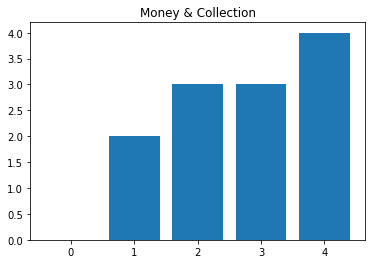

In [25]:
plt.title('Money & Collection')
x = np.zeros(162)
y = np.zeros(162)

for i, row in boardgame_data.iterrows():
    x[i] = row['Money']
for i, row in boardgame_data.iterrows():
    y[i] = row['Collection']


plt.bar(x, y)

(0.5, 3.5)

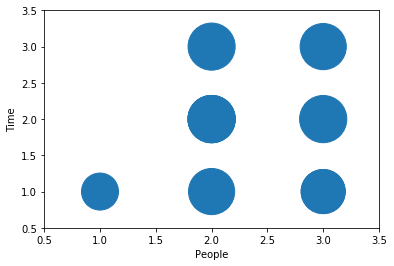

In [22]:
N=50
#area = np.pi * (15 * np.random.rand(N)) **2
boardgame_data.plot.scatter(x='People', y='Time', s= 10*(15 * np.random.rand(N)) **2)
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 3.5)

Consider TIME and MONEY, how much will pay for the preferred type ? 
考慮到付出金錢與需要花費的時間，你會為了你鍾愛的類型付出多少錢？

Text(0, 0.5, 'Collection')

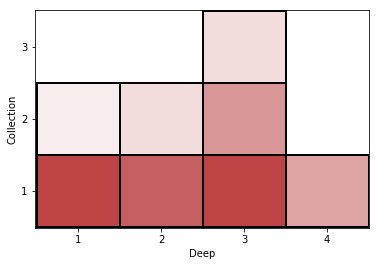

In [23]:
boardgame_data_sp = pd.read_csv('DataBaseSp.csv')

costBar=np.array([[5,2,4,5,6,7,8,9],[14,12,10,20,21,22,27,28],[14, 11, 6, 8, 0, 5, 14, 13],[14, 11, 6, 8, 0, 5, 14, 13]])

bar_width = 1
#inHalfHour = 
plt.bar(boardgame_data_sp['Deep'], 1, bar_width,color='#A70000',edgecolor='none',linewidth=2,alpha=0.07,bottom= boardgame_data_sp['Collection'] - 0.5)
#inHour = plt.bar(likeLevel, 1, bar_width,color='#A70000',edgecolor='black',linewidth=2,alpha=0.2,bottom=1.5) 
#overHour = plt.bar(likeLevel, 1, bar_width,color='#A70000',edgecolor='black',linewidth=2,alpha=0.2,bottom=2.5, hatch='////') 

plt.bar(boardgame_data_sp['Deep'], 1, bar_width,color='none',edgecolor='black',linewidth=2,alpha=1,bottom= boardgame_data_sp['Collection'] - 0.5)


plt.xlim(0.47, 4.51)
plt.ylim(0.49, 3.51)
plt.xticks(np.arange(1, 5, 1))
plt.yticks(np.arange(1, 4, 1))
plt.xlabel('Deep')
plt.ylabel('Collection')

探討遊戲著迷陳度對收藏量分析:可以明顯的看出較沉迷的玩家其所收藏的遊戲量較多